<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart8ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 8

##Ordinary Differential Equations

In [1]:
#Load your packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

While there is a lot we could say about ordinary differential equations, we will focus on one type, first order linear differential equation.  There are many ways to solve these (seperable, integrating factor, just integrate...)
$$
\frac{dy}{dx} = f(x,y) \quad\quad y(x_0)=y_0
$$
  My guess is that many of you have not taken diff eq, so I will not solve these analytically.

I am going to look at the equation,
$$
\frac{dy}{dx} = y\sin x+y\quad\quad y(0) = \pi
$$
Mostly cause I don't know how to solve it ;)

In [110]:
f = lambda x,y: 2*x*np.cos(x)+x*y**2# this is my function from above
t = np.linspace(0, 2, 1000000) #this is the interval I'll look at the solution for

sol = integrate.odeint(f,np.pi,t)

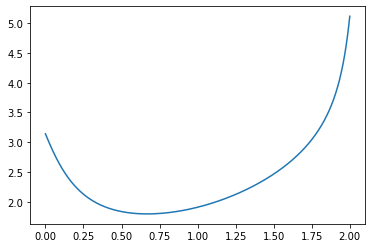

In [112]:
plt.plot(t, sol)

So this is a numerical solution but let's trust that the contributers to python are better at ODEs than we are.

## Euler's Method

For our first method, we will approximate the solution by computing the next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

In [84]:
def eulerMethod(function,initialValue,intervalForSolution):
  array = []
  y=initialValue
  h = intervalForSolution[1]-intervalForSolution[0]
  for i in intervalForSolution:
    array.append([y])
    y = y + f(i,y)*h
  return np.array(array)




In [90]:
mysol = eulerMethod(f,np.pi,t)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.


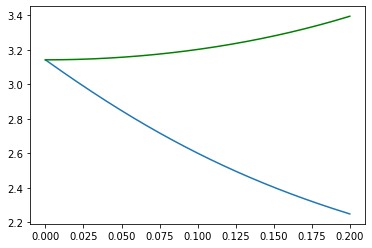

In [93]:
plt.plot(t[:100000], sol[:100000])
plt.plot(t[:100000], mysol[:100000],'g')

I played with this a lot!  I cannot get this answer to do much better.  My guess is that since my $f(x,y)$ is highly non-linear, the linear assumption of Euler's method is a bad idea!  Let's see if we can do any better with the Runga-Kutta Method.

##Runge-Kutta 4th Order

Much like Euler's method we are interested in solving a differential equation fo the form, $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [79]:
def rungeKutta(function, initialValue, intervalForSolution):
  h = intervalForSolution[1]-intervalForSolution[0]
  y = initialValue
  sol = []
  for i in intervalForSolution:
    sol.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(sol)

In [94]:
rsol = rungeKutta(f,np.pi,t)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.


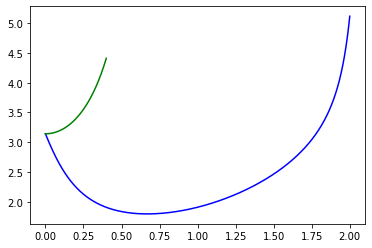

In [101]:
plt.plot(t, sol,'b')
plt.plot(t[0:200000], mysol[0:200000],'g')
#plt.plot(t[0:200000],rsol[0:200000],'r')